In [1]:
from datetime import datetime, timedelta
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

sys.path.append('..')
from util.batcher import Batcher
#from util.stock_loader import Loader

In [2]:
TODAY = datetime.now().date()
TOMORROW  = TODAY + timedelta(1)
TOMORROW

datetime.date(2023, 2, 4)

In [3]:
DATA = '../data'

sp1950 = pd.read_csv(f'{DATA}/sp1950.csv')
nya1965 = pd.read_csv(f'{DATA}/nya1965.csv')
nasdaq1965 = pd.read_csv(f'{DATA}/nasdaq1965.csv')
wilshire1990 = pd.read_csv(f'{DATA}/wilshire1990.csv')


nasdaq1965.tail()
states = pd.read_csv(f'{DATA}/hmm_exp_returns.csv')
states.index = pd.to_datetime(states.Date)
states.tail()

,Date,sp,sp_daily,sp_exp,nyse,nyse_daily,nyse_exp,nas,nas_daily,nas_exp,wil,wil_daily,wil_exp,mean_exp,state
Date,,,,,,,,,,,,,,,
2023-01-30,2023-01-30,4017.770020,0.987031,1.00052,15818.900391,0.990999,1.000669,11393.809570,0.980390,1.000525,40084.660156,0.986378,1.000362,1.000519,2
2023-01-31,2023-01-31,4076.600098,1.014642,1.00052,16036.389648,1.013749,1.000669,11584.549805,1.016741,1.000525,40724.960938,1.015974,1.000362,1.000519,2
2023-02-01,2023-02-01,4119.209961,1.010452,1.00052,16121.250000,1.005292,1.000669,11816.320312,1.020007,1.000525,41198.339844,1.011624,1.000362,1.000519,2
2023-02-02,2023-02-02,4179.759766,1.014699,1.00052,16122.580078,1.000083,1.000669,12200.820312,1.032540,1.000525,41832.320312,1.015388,1.000362,1.000519,2
2023-02-03,2023-02-03,4136.479980,0.989645,1.00052,15990.947266,0.991835,1.000669,12006.955078,0.984110,1.000525,41385.550781,0.989320,1.000362,1.000519,2


In [4]:
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'KNSL', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA',
    'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON',
    'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU',
    'RVLV', 'SAM', 'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC',
    'TEAM', 'TMUS', 'TREX', 'TSCO', 'TSLA', 'TTC', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV',
    'ZBRA', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'APPS', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CEF', 'CENN',
    'CGAU', 'COOP', 'CTGO', 'DQ', 'DTST', 'DYAI', 'EA',
    'EP', 'EPSN',  'ESOA', 'FCUV', 'FNV', 'FSI', 'GCBC', 'GME',
    'GNRC', 'GTLS', 'HBM', 'HMY', 'HNRG', 'IDR', 'INTZ', 'LPLA', 'MCVT',
    'MICS', 'MNMD', 'MOBQ', 'MTA', 'OMQS', 'PACB', 'PETV', 'POWW',
    'PRPH', 'RVP', 'RVYL', 'SAND', 'SOBR', 'STKL', 'UI', 'VIRT', 'WAVD',
    'WKHS', 'WRN', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'AORT', 'ATVI', 'BHC', 'CHS', 'CNXN', 'CRMT', 'CRUS', 'CUBI',
    'DORM', 'FKWL', 'LFMD', 'PARR', 'POWL', 'SIX', 'SRC', 'URBN',
    'USPH', 'VERU', 'VTSI', 'WGO']
len(SYMBOLS + LINGERERS + BEST_WEIGHTED)

164

In [5]:
TODAY = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 10
START = TODAY - timedelta(YEARS_OF_DATA * 365)
START, TODAY

(datetime.date(2013, 2, 6), datetime.date(2023, 2, 4))

In [6]:
batch = sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED)))

In [7]:
data = (
    yf
    .download(batch, start=START, end=TODAY)
    .rename(columns={'Adj Close': 'AdjClose'})
    .sort_index())

[*********************100%***********************]  164 of 164 completed


In [8]:
data['state'] = states.state
data.tail()

AdjClose                                                      \
                  AAPL ABMD        ABNB         ACN        ADBE      ADYEY   
Date                                                                         
2023-01-30  143.000000  NaN  109.480003  274.320007  363.420013  14.820000   
2023-01-31  144.289993  NaN  111.110001  279.049988  370.339996  15.040000   
2023-02-01  145.429993  NaN  113.989998  283.600006  383.920013  16.040001   
2023-02-02  150.820007  NaN  118.519997  294.100006  392.230011  17.700001   
2023-02-03  154.500000  NaN  118.699997  289.220001  379.329987  17.209999   

                                                     ... Volume          \
              AGI        AMD       AMEH        AMGN  ...   WAVD     WGO   
Date                                                 ...                  
2023-01-30  11.02  72.449997  34.220001  251.589996  ...  12700  314400   
2023-01-31  11.04  75.150002  35.639999  252.399994  ...  21500  430200   
2023-02-01  11.23  84.639999  36.270000  246.410004  ...  43300  518500   
2023-02-02  10.83  88.309998  36.959999  246.529999  ...  14100  997300   
2023-02-03  10.65  86.089996  36.349998  245.169998  ...  28733  445192   

                                                                            \
               WKHS     WRN        XPEV    ZBRA    ZEST         ZM    ZYXI   
Date                                                                         
2023-01-30  2362600  147700  19064600.0  240900   91300  7108400.0  277900   
2023-01-31  2538700  159500  21769400.0  264800   35200  2832700.0  224000   
2023-02-01  3136400   56400  20500400.0  442500   65200  3161100.0  304700   
2023-02-02  6362600  259600  20385300.0  787400  131400  5428400.0  243500   
2023-02-03  5727939  185141  15410507.0  494734   63695  3424221.0  732471   

           state  
                  
Date              
2023-01-30     2  
2023-01-31     2  
2023-02-01     2  
2023-02-02     2  
2023-02-03     2  

[5 rows x 985 columns]

In [9]:
STATES = sorted(states.state.unique())
STATES

[0, 1, 2, 3, 4, 5, 6, 7]

In [10]:
CURRENT_STATE = states.state[-1]
CURRENT_STATE

2

In [11]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (
        sub.AdjClose[stock][sub.AdjClose[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [12]:
def get_daily_returns(x):
    idx = x.index
    n = len(x)
    x = np.array(x)
    #return x[2:n] / x[1:(n - 1)] - 1 
    returns = x[1:n] / x[0:(n-1)] - 1
    returns = pd.Series(returns, index=idx[1:])
    return returns

In [13]:
def get_sharpe(returns, window=None):
    n = len(returns)
    if window is None:
        window = n
    if len(returns) > window:
        returns = returns[(n - window):n]
    returns = returns[~np.isnan(returns)]
    sharpe = (np.sqrt(252) * returns.mean()) / returns.std()
    return sharpe

In [14]:
def get_hedged_sharpe(daily_returns, data):
    state_sharpe = get_sharpe(
        daily_returns[data.state == CURRENT_STATE])
    lower_state_sharpe = get_sharpe(
        daily_returns[data.state == max(CURRENT_STATE - 1, 0)])
    upper_state_sharpe = get_sharpe(
        daily_returns[
            data.state == min(CURRENT_STATE + 1, max(STATES))])
    return min(state_sharpe, lower_state_sharpe, upper_state_sharpe)

In [15]:
trans = pd.read_csv('../data/transition_probs.csv')
trans

,next_state,prob
0,0,0.022480
1,1,0.005450
2,2,0.928474
3,3,0.022480
4,5,0.000681
5,6,0.000681
6,7,0.019755


In [16]:
def get_weighted_sharpe(daily_returns, data, trans=trans):
    #state_sharpe = get_sharpe(
    #    daily_returns[data.state == CURRENT_STATE])
    #n_lower = (data.state == max(CURRENT_STATE - 1, 0)).sum()
    #decr = 1 if n_lower else 2
    #lower_state_sharpe = get_sharpe(
    #    daily_returns[data.state == max(CURRENT_STATE - decr, 0)])
    #n_upper = (data.state == max(CURRENT_STATE + 1, 0)).sum()
    #incr = 1 if n_lower else 2
    #upper_state_sharpe = get_sharpe(
    #    daily_returns[
    #        data.state == min(CURRENT_STATE + incr, max(STATES))])
    #return (
    #    weights[0]*lower_state_sharpe
    #    + weights[1]*state_sharpe
    #    + weights[2]*upper_state_sharpe)
    out = 0
    for state, prob in zip(trans.next_state, trans.prob):
        if len(daily_returns[data.state == state]):
            state_sharpe = get_sharpe(
                daily_returns[data.state == state])        
            out += prob * state_sharpe
    return out

In [17]:
def rescale(a):
    a = a - a.min()
    a = a / a.max()
    return a

In [18]:
def vals_to_quantiles(a):
    n = len(a)
    qs = np.linspace(0, 1, n)
    order = np.argsort(a)
    out = qs[order]
    return out

In [19]:
def get_rsi(stock_data, window=14):
    df = stock_data.copy()
    df['deltas'] = df.AdjClose.diff(1)
    df['gains'] = df.deltas.clip(lower=0)
    df['losses'] = df.deltas.clip(upper=0).abs()
    df['avg_gain'] = (df.gains
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    df['avg_loss'] = (df.losses
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    
    # avg gains
    pd.options.mode.chained_assignment = None
    for i, row in enumerate(df.avg_gain.iloc[window + 1:]):
        df.avg_gain.iloc[i + window + 1] = (
            (df.avg_gain.iloc[i + window] * (window - 1) 
             + df.gains.iloc[i + window + 1]) 
            / window)
    # avg losses
    for i, row in enumerate(df.avg_loss.iloc[window + 1:]):
        df.avg_loss.iloc[i + window + 1] = (
            (df.avg_loss.iloc[i + window] * (window - 1)
             + df.losses.iloc[i + window + 1])
            / window)
    df['rs'] = df.avg_gain / df.avg_loss
    df['rsi'] = 100 - (100 / (1. + df.rs))
    return df.rsi

In [20]:
def get_macd(stock_data, fast=60, slow=90, signal=80, plot=False):
    df = stock_data.copy()
    exp1 = df.AdjClose.ewm(span=fast, adjust=False).mean()
    exp2 = df.AdjClose.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    if plot:
        plt.plot(macd, label='MACD', color='red')
        plt.plot(exp3, label='Signal', color='green')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.legend();
        plt.figure()
        plt.plot(histo, color='blue')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.axhline(y=0, color='k')
        plt.figure()
        plt.plot(is_rising)
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
    return is_rising

In [21]:
LMB = 0.9
RSI_WINDOW = 14
MACD_PARAMS = (60, 90, 80, False)

In [22]:
EXAMPLE = 'AAPL'

In [23]:
stock_data = get_stock_data(EXAMPLE, data.copy())
daily_returns = get_daily_returns(stock_data.AdjClose)
daily_returns
(get_sharpe(daily_returns), 
 get_sharpe(daily_returns[data.state == CURRENT_STATE]))

(0.9761101044128461, -0.17710926581917696)

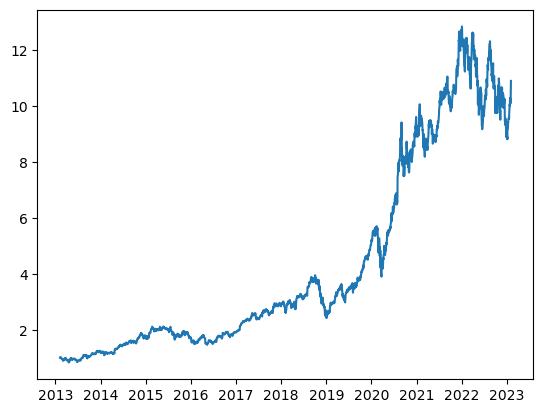

In [24]:
plt.plot(
    (get_daily_returns(data[('AdjClose', EXAMPLE)]) + 1).cumprod());

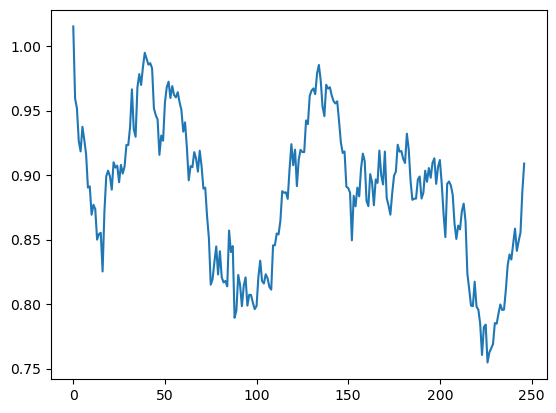

In [25]:
dr = get_daily_returns(
    data[('AdjClose', EXAMPLE)]
)[data.state == CURRENT_STATE]
dr = dr[dr.notnull()]
plt.plot((dr + 1).to_numpy().cumprod());

In [26]:
get_weighted_sharpe(daily_returns, data.copy())

-0.1280809998090405

In [27]:
def process_stock(stock, data, lmb=LMB, plot=False):
    stock_data = get_stock_data(stock, data)
    n = len(stock_data.AdjClose[~np.isnan(stock_data.AdjClose)])
    stock_data['direction'] = get_macd(stock_data, *MACD_PARAMS)
    stock_data['rsi'] = get_rsi(stock_data, window=RSI_WINDOW)
    stock_data.rsi = stock_data.rsi.rank(pct=True)
    daily_returns = get_daily_returns(stock_data.AdjClose)
    sharpe = get_sharpe(daily_returns)
    #state_sharpe = get_sharpe(
    #    daily_returns[data.state == CURRENT_STATE])
    #hedged_sharpe = get_hedged_sharpe(daily_returns, data)
    weighted_sharpe = get_weighted_sharpe(daily_returns, data)
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)
    WINDOW = min(n // 2, 125)
    stock_data['ann_high'] = (
        stock_data.AdjClose.rolling(window=WINDOW).max())
    stock_data['ann_low'] = (
        stock_data.AdjClose.rolling(window=WINDOW).min())
    stock_data['drawdown'] = stock_data.AdjClose / stock_data.ann_high
    stock_data.drawdown = stock_data.drawdown.rank(pct=True)
    stock_data['pullup'] = stock_data.AdjClose / stock_data.ann_low
    stock_data.pullup = stock_data.pullup.rank(pct=True)
    w = [lmb ** t for t in range(n)][::-1]
    stock_data['W'] = w
    stock_data['n_samp'] = (stock_data.Volume / 100)  * stock_data.W
    stock_data['value'] = (
        (stock_data.AdjClose 
         + stock_data.High 
         + stock_data.Low 
         + stock_data.Open) 
        / 4)
    stock_data['est'] = np.nan
    for day in stock_data.index:
        sub = stock_data[stock_data.index <= day]
        weights = sub.n_samp
        weights = weights / weights.sum()
        values = sub.value
        est = np.dot(weights, values)
        stock_data.loc[day, 'est'] = est
    stock_data['resid'] = stock_data.AdjClose / stock_data.est
    stock_data.resid = stock_data.resid.rank(pct=True)
    stock_data.sort_values('resid', inplace=True)
    n_notnull_resid = stock_data.resid.notnull().sum()
    stock_data['dev'] = np.nan
    stock_data.loc[stock_data.resid.notnull(), 'dev'] = (
        np.array(range(n_notnull_resid) / n_notnull_resid))
    stock_data.dev = stock_data.dev.rank(pct=True)
    stock_data.sort_index(inplace=True)
    if plot:
        plt.figure(figsize=(12, 8))
        plt.plot(stock_data.AdjClose, label='AdjClose')
        plt.plot(stock_data.est, label='Est')
        plt.yscale('log')
        plt.plot(stock_data.ann_high, color='green')
        plt.plot(stock_data.ann_low, color='red')
        plt.xlim([stock_data.index[-250], stock_data.index[-1]])
        plt.legend();
        
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.dev)
        plt.axhline(0.5, color='k')
        plt.xlim([stock_data.index[-250], stock_data.index[-1]])
        plt.title(stock)
        
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.drawdown, color='red', label='drawdown')
        plt.plot(stock_data.pullup, color='green', label='pullup')
        plt.plot(
            np.sqrt(stock_data.drawdown * stock_data.pullup),
            color='grey',
            label='geomean')
        plt.yscale('log')
        plt.legend()
    return (
        stock_data.direction.tolist()[-1],
        stock_data.rsi.tolist()[-1],
        stock_data.resid.tolist()[-1], 
        stock_data.dev.tolist()[-1],
        stock_data.drawdown.tolist()[-1],
        stock_data.pullup.tolist()[-1],
        sharpe,
        #state_sharpe,
        #hedged_sharpe,
        weighted_sharpe)

(1,
 0.7115461446264483,
 0.6029411764705882,
 0.6029411764705882,
 0.7252402841621396,
 0.23297116590054326,
 0.9479723642270024,
 1.235711162639553)

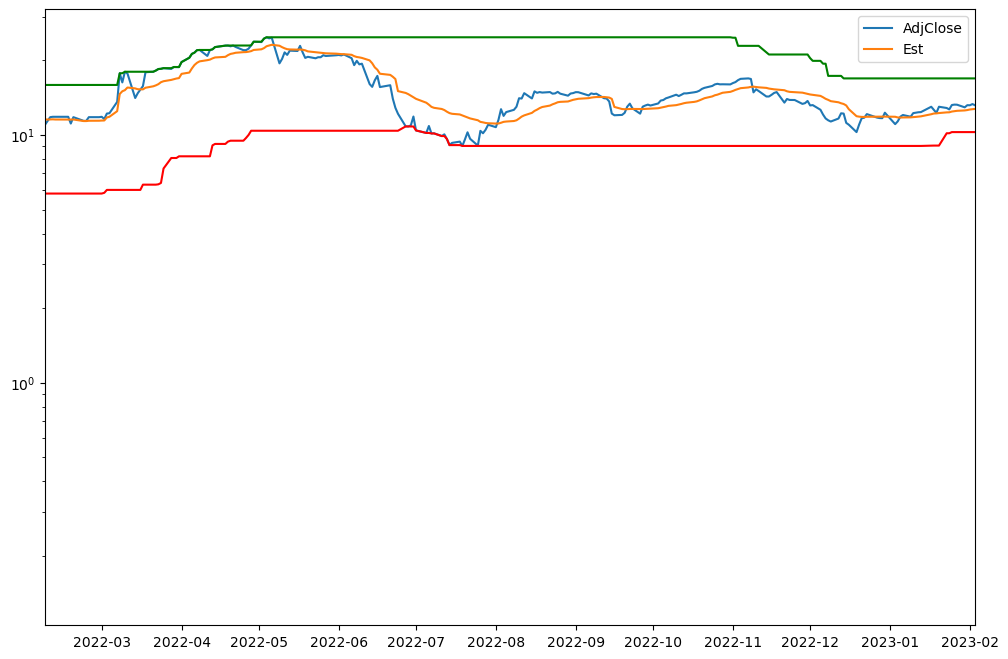

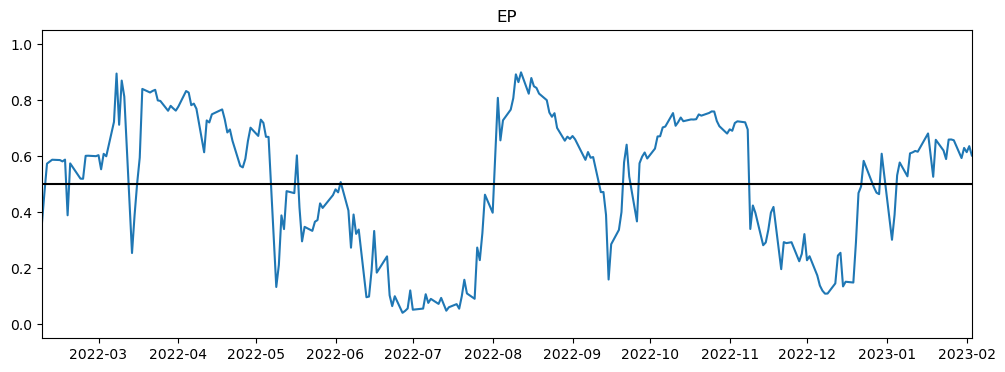

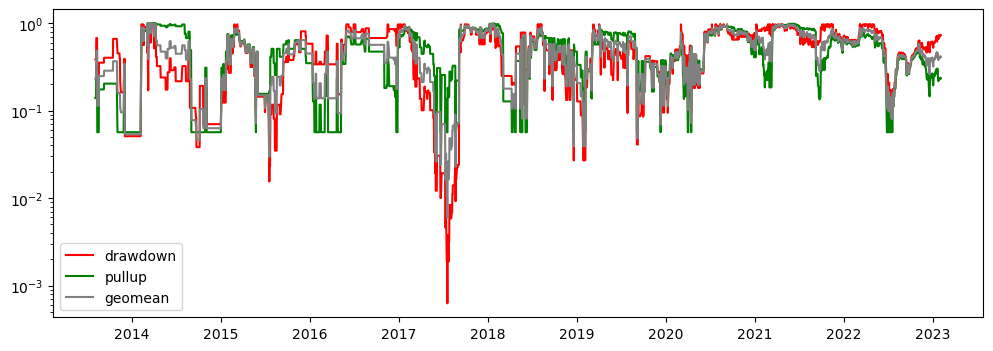

In [28]:
process_stock('EP', data.copy(), plot=True)

In [29]:
out = []
for stock in batch:
    print(f'{stock}...', end=' ')
    stock_stats = process_stock(stock, data)
    out.append([stock, *stock_stats])

AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMZN... ANET... AORT... APPS... APT... ASML... ATVI... AXON... BHC... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHS... CHWY... CNXN... COOP... CRMT... CRUS... CRWD... CTGO... CUBI... DDOG... DGX... DIS... DOCS... DOCU... DORM... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... EPSN... ESOA... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GH... GME... GMED... GNRC... GOOG... GTLS... HBM... HMY... HNRG... IDR... IDXX... INTG... INTZ... ISRG... JD... KNSL... LFMD... LPLA... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PARR... PAYC... PETV... PINS... POWL... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD... ROKU... RVLV... RVP... RVYL... SAM... SAND... SBUX... SE... SHOP... SIX... SNOW... SOBR.

In [30]:
out_df = pd.DataFrame(
    data=out, 
    columns=[
        'stock', 'direction', 'RSI', 'fair_value_mult', 'dev_quantile',
        'drop','climb', 'sharpe', 'weighted_sharpe'])
out_df['geomean'] = np.sqrt(out_df['drop'] * out_df.climb)
out_df['score'] = (
    out_df.fair_value_mult
    * out_df.dev_quantile
    * out_df['drop']
    * out_df.climb) ** (1/4) 
out_df['RSIRev'] = 1 - out_df.RSI
out_df = out_df[
    ['stock', 'direction', 'RSI', 'RSIRev', 'fair_value_mult', 
     #'dev_quantile',
     'drop', 'climb', 'geomean', 'score',  'sharpe',
     'weighted_sharpe']]
out_df.RSI.fillna(out_df.RSI.median())
out_df.RSIRev.fillna(out_df.RSIRev.median())

out_df.weighted_sharpe.fillna(
    out_df.weighted_sharpe.mean(), inplace=True)
out_df.sort_values('stock')
out_df.head()

,stock,direction,RSI,RSIRev,fair_value_mult,drop,climb,geomean,score,sharpe,weighted_sharpe
0,AAPL,1,0.916900,0.083100,0.995232,0.265357,0.508567,0.367358,0.459025,0.976110,-0.128081
1,ABMD,0,0.915901,0.084099,0.402265,0.891977,0.762432,0.824665,0.684431,0.953581,0.730326
2,ABNB,1,0.986717,0.013283,0.977819,0.925659,0.973621,0.949337,0.736877,0.124054,0.847064
3,ACN,1,0.602477,0.397523,0.956694,0.178855,0.511492,0.302461,0.423490,0.771230,0.603846
4,ADBE,1,0.716740,0.283260,0.868892,0.136649,0.858337,0.342477,0.463920,0.883519,-0.282987


In [31]:
out_df.geomean.quantile([0.05, 0.99])

0.05    0.123559
0.99    0.964236
Name: geomean, dtype: float64

In [32]:
out_df.to_csv('individ_quantiles.csv', index=False)

In [33]:
!open individ_quantiles.csv